<h1>Figure 5</h1>
<p>The following files contain data used in the analyses for this figure:</p>
<table>
    <tr>
        <th>File</th>
        <th>Content</th>
    </tr>
    <tr>
        <td><a href="Raw Data/120325 HIS3 variants 1.csv" target=_blank>120325 HIS3 variants 1.csv</a> and <a href="Raw Data/120325 HIS3 variants 2.csv" target=_blank>120325 HIS3 variants 2.csv</a></td>
        <td>Growth rates for yeast strains expressing codon variants of the <i>HIS3</i> gene in different media.</td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
%cd Scripts
%run GR.py
%cd ..

C:\Users\Tvon-\Dropbox\Python\18 Codon Selection\Scripts
C:\Users\Tvon-\Dropbox\Python\18 Codon Selection


In [2]:
GR_His1 = process_GR('Raw Data/120325 HIS3 variants 1.csv', normalise=False, starting_row = 8)
GR_His2 = process_GR('Raw Data/120325 HIS3 variants 2.csv', normalise=False, starting_row = 8)

In [3]:
#join the two datasets
GR_His = pd.concat([GR_His1,GR_His2],ignore_index=True)
#remove data for emtpy wells
GR_His = GR_His.loc[GR_His['Plasmid'] != 'empty']
#split factor into separate factors for vector and medium
vector,medium = [],[]
for row in range(GR_His.shape[0]):
    this_factor = GR_His.iloc[row].Plasmid
    fact1,fact2 = this_factor.split(':')
    vector.append(fact1)
    medium.append(fact2)

GR_His['Vector'] = vector
GR_His['Medium'] = medium

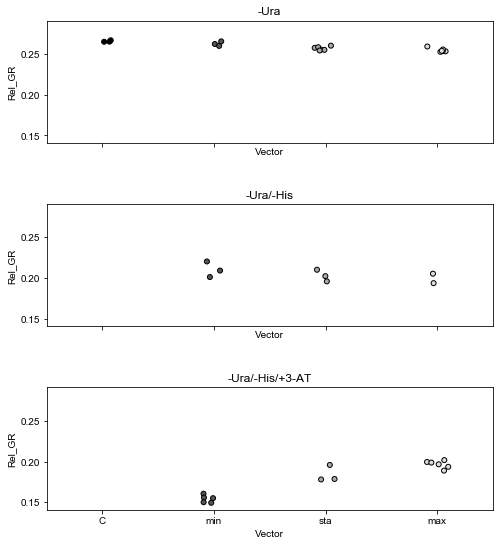

In [4]:
#Plot data for the three different media
GR_U = GR_His.loc[GR_His['Medium'] == 'U']
GR_UH = GR_His.loc[GR_His['Medium'] == 'UH']
GR_UHA = GR_His.loc[GR_His['Medium'] == 'UHA']

f, axs = plt.subplots(3, sharex=True,sharey=True,figsize=(8,9))

sns.set_style('whitegrid')
sns.set_palette(['#000000','#555555','#aaaaaa','#dddddd'])

sns.stripplot(x='Vector',y='Rel_GR',data=GR_U,jitter=True,dodge=True,order=['C','min','sta','max'], edgecolor = '#000000',linewidth=1,ax=axs[0])
axs[0].set_title('-Ura')
sns.stripplot(x='Vector',y='Rel_GR',data=GR_UH,jitter=True,dodge=True,order=['C','min','sta','max'], edgecolor = '#000000',linewidth=1,ax=axs[1])
axs[1].set_title('-Ura/-His')
sns.stripplot(x='Vector',y='Rel_GR',data=GR_UHA,jitter=True,dodge=True,order=['C','min','sta','max'], edgecolor = '#000000',linewidth=1,ax=axs[2])
axs[2].set_title('-Ura/-His/+3-AT')

plt.subplots_adjust(hspace=0.5)

#plt.savefig('Figure 5.svg')

plt.show()

In [5]:
#do statistics 
mc = MultiComparison(GR_UHA['Rel_GR'], GR_UHA['Plasmid'])
result = mc.tukeyhsd(alpha=0.001)
#recover the results into a data frame 
result_frame = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])
print(result_frame)

    group1   group2  meandiff   lower   upper  reject
0  max:UHA  min:UHA   -0.0423 -0.0607 -0.0240    True
1  max:UHA  sta:UHA   -0.0123 -0.0338  0.0091   False
2  min:UHA  sta:UHA    0.0300  0.0079  0.0521    True
